# Analiza športnnih stav

V tem dokumentu je prikazana analiza posameznih športov. Podatki so pobrani iz strani bwin.com(http://bwin.com). Najprej si pripravimo vse podatke, ki jih bomo kasneje analizirali.

In [1]:
import re
import datetime
import os
import pandas as pd
import orodja
import csv

seznam_datumov = os.listdir('zajete-strani')

def sez_sportov(datum):
    seznam = []
    for stran in os.listdir('zajete-strani/' + datum + '/bwin'):
        seznam += [stran[:-5]] 
    return seznam 

def slovar_datum_kategorije():
    slovar = {}
    for datum in seznam_datumov:
        slovar[datum] = sez_sportov(datum)
    return slovar

def sportniki(datum, tabela):
    slovar = {}
    for sport in sez_sportov(datum):
        slovar[sport] = pd.read_csv('csv-datoteke/' + datum + '/bwin/' + sport + '/' + tabela)
    return slovar

def tabela(tabela):
    slovar = {}
    for datum in seznam_datumov:
        slovar[datum] = sportniki(datum, tabela)
    return slovar
tabela_sportnikov = tabela('sportniki_surovo.csv')
tabela_dogodkov = tabela('dogodki.csv')
tabela_kategorij = tabela('kategorije.csv')
tabela_kat_sportnikov = tabela('sportniki.csv')
#orodja.zapisi_tabelo(tabela_sportnikov, ['sport'], 'csv-datoteke/sportniki.csv')
#tabela_sportnikov

###############################################################
# Ustvarjanje tabele sportniki.csv !!! Popravi kodo !!!
###############################################################
#slovar_datum_kategorije()
#with open('csv-datoteke/sportniki.csv', 'w', encoding='utf-8') as csv_dat:
#    writer = csv.DictWriter(csv_dat, fieldnames = seznam_datumov) #, 'csv-datoteke/sportniki.csv')
#    writer.writeheader()
#    slovar = slovar_datum_kategorije()
#    for k, v in slovar.items():
#        for kat in v:
#            writer.writerow({k:kat})
###############################################################

## Kategorija alpsko smučanje na dan 16.1.2016

In [81]:
tabela16 = tabela_sportnikov['2016-01-16']

In [82]:
alpsko_smucanje16 = tabela16['alpine-skiing']

### Analiza športnikov
Takole izgleda nekaj športnikov v tabeli dne 16.1.2016 pod kategorijo na strani alpsko smučanje. Pozor! Vsi športniki na strani niso nujno alpski smučarji.

In [83]:
alpsko_smucanje16.head()

,sportnik,drzava,kvota
0,Barry Hawkins,ENG,2.75
1,Judd Trump,ENG,1.40
2,Ronnie O&#39;Sullivan,ENG,1.30
3,Stuart Bingham,ENG,3.25
4,Brandt Snedeker,USA,4.00


#### Športniki z najnižjo kvoto

In [48]:
alpsko_smucanje16[alpsko_smucanje16.kvota < 1.1].sort_values(by='kvota').head()

,sportnik,drzava,kvota
61,Joseph Parker,NZL,1.01
71,George Groves,ENG,1.01
462,Novak Djokovic,SRB,1.01
466,Roger Federer,SUI,1.01
509,Tomas Berdych,CZE,1.01


#### Kvote slovenskih športnikov

In [50]:
alpsko_smucanje16[alpsko_smucanje16.drzava == 'SLO'].sort_values(by='kvota')

,sportnik,drzava,kvota
459,Polona Hercog,SLO,3.5
616,Matej Zagar,SLO,19.0
680,Ana Drev,SLO,51.0
692,Ana Drev,SLO,51.0
232,Borut Bozic,SLO,101.0
257,Borut Bozic,SLO,101.0
648,Klemen Kosi,SLO,251.0


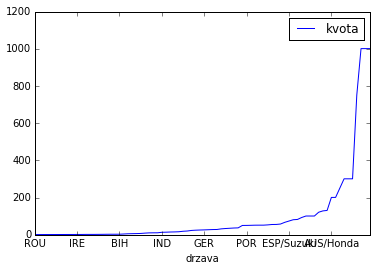

In [53]:
% matplotlib inline
alpsko_smucanje16.groupby('drzava').mean().sort_values(by='kvota').plot()

#### Povprečna kvota glede na državo

In [54]:
alpsko_smucanje16.groupby('drzava').mean().sort_values(by='kvota').head()

,kvota
drzava,
ROU,1.150
UZB,1.220
PHI,1.360
PUR,1.415
URU,1.450


#### Število športnikov glede na države

In [56]:
alpsko_smucanje16.groupby('drzava').count().sort_values(['kvota'], ascending=[False]).head()

,sportnik,kvota
drzava,,
USA,108,108
FRA,65,65
ITA,58,58
GER,44,44
BEL,31,31


#### Povprečna kvota glede na državo

Da ne bi prihajalo do prevelikih izjem, so v poizvedbi le države z več kot 4 športniki.

In [58]:
kvota_drzava = alpsko_smucanje16.groupby('drzava').sum()
povp_kvota_drzava = alpsko_smucanje16.groupby('drzava').mean()
stevilo_drzava = alpsko_smucanje16.groupby('drzava').count()[['sportnik']]
kvota_in_stevilo_po_drzavah = pd.merge(kvota_drzava.reset_index(), stevilo_drzava.reset_index())
kvota_na_sportnika = kvota_in_stevilo_po_drzavah.kvota/kvota_in_stevilo_po_drzavah.sportnik
kvota_in_stevilo_po_drzavah['kvota na sportnika'] = kvota_na_sportnika
sportniki_analiza_vsi = kvota_in_stevilo_po_drzavah.sort_values(['kvota na sportnika'])
sportniki_analiza = sportniki_analiza_vsi[kvota_in_stevilo_po_drzavah.sportnik >= 5 ]
sportniki_analiza.head()

/usr/lib64/python3.4/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,drzava,kvota,sportnik,kvota na sportnika
12,CRO,8.76,6,1.460000
46,JPN,20.94,10,2.094000
68,SRB,12.70,6,2.116667
37,HUN,27.38,11,2.489091
7,BRA,27.80,10,2.780000


/usr/lib64/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


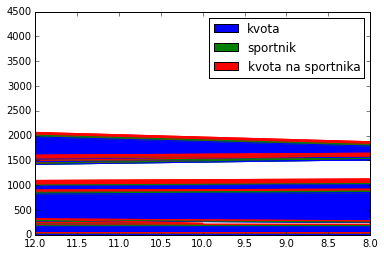

In [59]:
sportniki_analiza.plot(kind='area')

/usr/lib64/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


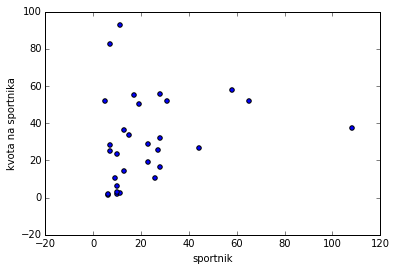

In [60]:
sportniki_analiza.plot.scatter('sportnik', 'kvota na sportnika')

### Natančnejša analiza športnikov

In [66]:
sportn16 = tabela_kat_sportnikov['2016-01-16']['alpine-skiing']

Vidimo lahko, da je kvota najnižja pri boksu.

In [67]:
sportn16.sort_values(by='kvota').head()

,dogodek,kvota,drzava,sportnik
6,Catchweight\n - World,1.01,ENG,George Groves
2,Heavyweight\n - World,1.05,ENG,David Haye
4,Welterweight\n - World,1.13,USA,Danny Garcia
26,ATP Challenger - Buenos Aires (ARG) - Doubles ...,1.15,RUS,Mikhail Youzhny
7,Lightweight\n - World,1.18,ENG,Terry Flanagan


### Analiza dogodkov

In [69]:
dogodki16 = tabela_dogodkov['2016-01-16']['alpine-skiing']
dogodki16.head()

,dogodek,drzava
0,AFL,Australia
1,The Masters,World
2,Super League,England
3,Challenge Cup,England
4,National Rugby League,Australia


# Nadaljevanje

Zgoraj je predstavljen le en primer podatkov iz strani pobranih dne 16.1.2016 na strani alpskega smučanja. Te podatke lahko pridobimo tudi še za druge datume in športe

V spodnji tabeli so naštete vse možnosti.

In [107]:
vse_moznosti = pd.read_csv('csv-datoteke/sportniki.csv')
vse_moznosti

,2016/01/20,2016/01/21,2016/01/18,2016/01/16,2016/01/17,2016/01/22
0,aussie-rules,aussie-rules,aussie-rules,aussie-rules,aussie-rules,aussie-rules
1,snooker,snooker,snooker,snooker,snooker,snooker
2,rugby-league,rugby-league,rugby-league,rugby-league,rugby-league,rugby-league
3,golf,golf,golf,golf,golf,golf
4,boxing,boxing,boxing,boxing,boxing,boxing
5,specials,specials,beach-volleyball,specials,specials,specials
6,beach-volleyball,beach-volleyball,swimming,beach-volleyball,beach-volleyball,beach-volleyball
7,swimming,swimming,rugby-union,swimming,swimming,swimming
8,rugby-union,rugby-union,floorball,rugby-union,rugby-union,rugby-union
9,floorball,floorball,cycling,floorball,floorball,floorball


In [6]:
def analiza(datum, kategorija):
    analiza_tabela = tabela_sportnikov[datum][kategorija]
    kvota_drzava = analiza_tabela.groupby('drzava').sum()
    povp_kvota_drzava = analiza_tabela.groupby('drzava').mean()
    stevilo_drzava = analiza_tabela.groupby('drzava').count()[['sportnik']]
    kvota_in_stevilo_po_drzavah = pd.merge(kvota_drzava.reset_index(), stevilo_drzava.reset_index())
    kvota_na_sportnika = kvota_in_stevilo_po_drzavah.kvota/kvota_in_stevilo_po_drzavah.sportnik
    kvota_in_stevilo_po_drzavah['kvota na sportnika'] = kvota_na_sportnika
    sportniki_analiza_vsi = kvota_in_stevilo_po_drzavah.sort_values(['kvota na sportnika'])
    sportniki_analiza = sportniki_analiza_vsi[kvota_in_stevilo_po_drzavah.sportnik >= 5 ]
    sportniki_analiza.plot.scatter('sportnik', 'kvota na sportnika')    
    return sportniki_analiza
analiza('2016-01-21', 'football').head()

/usr/lib64/python3.4/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,drzava,kvota,sportnik,kvota na sportnika
97,TUR,13.98,8,1.747500
48,HKG,11.33,6,1.888333
110,WAL,23.49,12,1.957500
90,SRB,11.87,5,2.374000
60,JPN,29.95,11,2.722727


In [11]:
tabela_sportnikov['2016-01-21']['football'].groupby('drzava').count().sort_values(['kvota'], ascending=[False]).head()

,sportnik,kvota
drzava,,
USA,138,138
FRA,64,64
ENG,54,54
ITA,50,50
GER,37,37
